In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import time

import datetime as datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('merged_Floor2.csv')#,index_col=0)
df

,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),...,z3_Plug(kW),z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux)
0,2018-07-01 00:00:00,0.0,0.01,0.15,28.36,58.93,0.0,1.08,0.0,0.0,...,0.32,29.30,68.22,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2018-07-01 00:01:00,0.0,0.01,0.15,28.36,58.91,0.0,1.07,0.0,0.0,...,0.32,29.30,68.21,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,2018-07-01 00:02:00,0.0,0.01,0.15,28.36,58.94,0.0,0.88,0.0,0.0,...,0.28,29.29,68.24,0.0,0.0,0.0,0.0,NaN,NaN,NaN
3,2018-07-01 00:03:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,...,0.32,29.29,68.28,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,2018-07-01 00:04:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,...,0.32,29.29,68.30,0.0,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,0.0,0.01,0.18,27.65,61.50,0.0,1.12,0.0,0.0,...,0.24,28.34,58.94,0.0,0.0,0.0,0.0,27.81,55.30,0.0
790556,2019-12-31 23:56:00,0.0,0.01,0.18,27.66,61.45,0.0,1.13,0.0,0.0,...,0.24,28.34,58.36,0.0,0.0,0.0,0.0,27.81,55.60,0.0
790557,2019-12-31 23:57:00,0.0,0.01,0.18,27.65,61.49,0.0,1.16,0.0,0.0,...,0.24,28.37,57.74,0.0,0.0,0.0,0.0,27.80,55.10,0.0
790558,2019-12-31 23:58:00,0.0,0.01,0.18,27.66,61.50,0.0,1.17,0.0,0.0,...,0.24,28.35,57.83,0.0,0.0,0.0,0.0,27.82,55.80,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790560 entries, 0 to 790559
Data columns (total 37 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          790560 non-null  object 
 1   z1_AC1(kW)    760318 non-null  float64
 2   z1_Light(kW)  789492 non-null  float64
 3   z1_Plug(kW)   789487 non-null  float64
 4   z1_S1(degC)   515922 non-null  float64
 5   z1_S1(RH%)    515922 non-null  float64
 6   z1_S1(lux)    515922 non-null  float64
 7   z2_AC1(kW)    760084 non-null  float64
 8   z2_AC2(kW)    787961 non-null  float64
 9   z2_AC3(kW)    787961 non-null  float64
 10  z2_AC4(kW)    787961 non-null  float64
 11  z2_AC5(kW)    789417 non-null  float64
 12  z2_AC6(kW)    789417 non-null  float64
 13  z2_AC7(kW)    789417 non-null  float64
 14  z2_AC8(kW)    789417 non-null  float64
 15  z2_AC9(kW)    789417 non-null  float64
 16  z2_AC10(kW)   789417 non-null  float64
 17  z2_AC11(kW)   789417 non-null  float64
 18  z2_A

In [4]:
df['date_only'] = df['Date'].str.split(pat=' ').str[0]
df

,Date,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),...,z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),date_only
0,2018-07-01 00:00:00,0.0,0.01,0.15,28.36,58.93,0.0,1.08,0.0,0.0,...,29.30,68.22,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
1,2018-07-01 00:01:00,0.0,0.01,0.15,28.36,58.91,0.0,1.07,0.0,0.0,...,29.30,68.21,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
2,2018-07-01 00:02:00,0.0,0.01,0.15,28.36,58.94,0.0,0.88,0.0,0.0,...,29.29,68.24,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
3,2018-07-01 00:03:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,...,29.29,68.28,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
4,2018-07-01 00:04:00,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,...,29.29,68.30,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790555,2019-12-31 23:55:00,0.0,0.01,0.18,27.65,61.50,0.0,1.12,0.0,0.0,...,28.34,58.94,0.0,0.0,0.0,0.0,27.81,55.30,0.0,2019-12-31
790556,2019-12-31 23:56:00,0.0,0.01,0.18,27.66,61.45,0.0,1.13,0.0,0.0,...,28.34,58.36,0.0,0.0,0.0,0.0,27.81,55.60,0.0,2019-12-31
790557,2019-12-31 23:57:00,0.0,0.01,0.18,27.65,61.49,0.0,1.16,0.0,0.0,...,28.37,57.74,0.0,0.0,0.0,0.0,27.80,55.10,0.0,2019-12-31
790558,2019-12-31 23:58:00,0.0,0.01,0.18,27.66,61.50,0.0,1.17,0.0,0.0,...,28.35,57.83,0.0,0.0,0.0,0.0,27.82,55.80,0.0,2019-12-31


In [5]:
df2 = df[df['date_only'] == '2018-07-01'].drop('Date',axis=1)
df2

,z1_AC1(kW),z1_Light(kW),z1_Plug(kW),z1_S1(degC),z1_S1(RH%),z1_S1(lux),z2_AC1(kW),z2_AC2(kW),z2_AC3(kW),z2_AC4(kW),...,z3_S1(degC),z3_S1(RH%),z3_S1(lux),z4_AC1(kW),z4_Light(kW),z4_Plug(kW),z4_S1(degC),z4_S1(RH%),z4_S1(lux),date_only
0,0.0,0.01,0.15,28.36,58.93,0.0,1.08,0.0,0.0,0.0,...,29.30,68.22,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
1,0.0,0.01,0.15,28.36,58.91,0.0,1.07,0.0,0.0,0.0,...,29.30,68.21,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
2,0.0,0.01,0.15,28.36,58.94,0.0,0.88,0.0,0.0,0.0,...,29.29,68.24,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
3,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,0.0,...,29.29,68.28,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
4,0.0,0.01,0.15,28.36,58.94,0.0,1.06,0.0,0.0,0.0,...,29.29,68.30,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0.0,0.01,0.15,29.30,60.90,0.0,0.89,0.0,0.0,0.0,...,29.77,68.48,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
1436,0.0,0.02,0.14,29.30,60.92,0.0,1.03,0.0,0.0,0.0,...,29.78,68.38,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
1437,0.0,0.01,0.14,29.31,60.95,0.0,1.02,0.0,0.0,0.0,...,29.78,68.24,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01
1438,0.0,0.01,0.14,29.31,61.00,0.0,1.02,0.0,0.0,0.0,...,29.77,68.19,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2018-07-01


In [6]:
date_list = df['date_only'].unique()
date_list

array(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
       '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
       '2018-07-09', '2018-07-10', '2018-07-11', '2018-07-12',
       '2018-07-13', '2018-07-14', '2018-07-15', '2018-07-16',
       '2018-07-17', '2018-07-18', '2018-07-19', '2018-07-20',
       '2018-07-21', '2018-07-22', '2018-07-23', '2018-07-24',
       '2018-07-25', '2018-07-26', '2018-07-27', '2018-07-28',
       '2018-07-29', '2018-07-30', '2018-07-31', '2018-08-01',
       '2018-08-02', '2018-08-03', '2018-08-04', '2018-08-05',
       '2018-08-06', '2018-08-07', '2018-08-08', '2018-08-09',
       '2018-08-10', '2018-08-11', '2018-08-12', '2018-08-13',
       '2018-08-14', '2018-08-15', '2018-08-16', '2018-08-17',
       '2018-08-18', '2018-08-19', '2018-08-20', '2018-08-21',
       '2018-08-22', '2018-08-23', '2018-08-24', '2018-08-25',
       '2018-08-26', '2018-08-27', '2018-08-28', '2018-08-29',
       '2018-08-30', '2018-08-31', '2018-09-01', '2018-

In [7]:
df.columns

Index(['Date', 'z1_AC1(kW)', 'z1_Light(kW)', 'z1_Plug(kW)', 'z1_S1(degC)',
       'z1_S1(RH%)', 'z1_S1(lux)', 'z2_AC1(kW)', 'z2_AC2(kW)', 'z2_AC3(kW)',
       'z2_AC4(kW)', 'z2_AC5(kW)', 'z2_AC6(kW)', 'z2_AC7(kW)', 'z2_AC8(kW)',
       'z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)',
       'z2_AC13(kW)', 'z2_AC14(kW)', 'z2_Light(kW)', 'z2_Plug(kW)',
       'z2_S1(degC)', 'z2_S1(RH%)', 'z2_S1(lux)', 'z3_Light(kW)',
       'z3_Plug(kW)', 'z3_S1(degC)', 'z3_S1(RH%)', 'z3_S1(lux)', 'z4_AC1(kW)',
       'z4_Light(kW)', 'z4_Plug(kW)', 'z4_S1(degC)', 'z4_S1(RH%)',
       'z4_S1(lux)', 'date_only'],
      dtype='object')

In [8]:
lights = ['z1_Light(kW)','z2_Light(kW)', 'z3_Light(kW)' ,'z4_Light(kW)']
acs = ['z1_AC1(kW)','z2_AC1(kW)','z2_AC2(kW)','z2_AC3(kW)','z2_AC4(kW)','z2_AC5(kW)', 'z2_AC6(kW)', 'z2_AC7(kW)', 'z2_AC8(kW)','z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)','z2_AC13(kW)', 'z2_AC14(kW)','z4_AC1(kW)']
plug = ['z1_Plug(kW)','z2_Plug(kW)','z3_Plug(kW)','z4_Plug(kW)']
temp=['z1_S1(degC)','z2_S1(degC)','z3_S1(degC)','z4_S1(degC)']
humd=['z1_S1(RH%)','z2_S1(RH%)','z3_S1(RH%)','z4_S1(RH%)']
amblig=['z1_S1(lux)','z2_S1(lux)','z3_S1(lux)','z4_S1(lux)']

In [9]:
consump=lights+acs+plug
consump

['z1_Light(kW)',
 'z2_Light(kW)',
 'z3_Light(kW)',
 'z4_Light(kW)',
 'z1_AC1(kW)',
 'z2_AC1(kW)',
 'z2_AC2(kW)',
 'z2_AC3(kW)',
 'z2_AC4(kW)',
 'z2_AC5(kW)',
 'z2_AC6(kW)',
 'z2_AC7(kW)',
 'z2_AC8(kW)',
 'z2_AC9(kW)',
 'z2_AC10(kW)',
 'z2_AC11(kW)',
 'z2_AC12(kW)',
 'z2_AC13(kW)',
 'z2_AC14(kW)',
 'z4_AC1(kW)',
 'z1_Plug(kW)',
 'z2_Plug(kW)',
 'z3_Plug(kW)',
 'z4_Plug(kW)']

In [10]:
df[df['date_only'] == '2018-07-01'][lights].sum().sum()

132.25

In [11]:
a=df[['z1_Light(kW)','z2_Light(kW)', 'z3_Light(kW)' ,'z4_Light(kW)']].sum().sum()
b=df[['z1_AC1(kW)','z2_AC1(kW)','z2_AC2(kW)','z2_AC3(kW)','z2_AC4(kW)','z2_AC5(kW)', 'z2_AC6(kW)', 'z2_AC7(kW)', 'z2_AC8(kW)','z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)','z2_AC13(kW)', 'z2_AC14(kW)','z4_AC1(kW)']].sum().sum()
c=df[['z1_Plug(kW)','z2_Plug(kW)','z3_Plug(kW)','z4_Plug(kW)']].sum().sum()
y=a+b+c
y

21899764.770000003

In [12]:
df2[['z1_Light(kW)','z1_Plug(kW)']].sum()

z1_Light(kW)     16.10
z1_Plug(kW)     213.94
dtype: float64

In [13]:
df[plug]

,z1_Plug(kW),z2_Plug(kW),z3_Plug(kW),z4_Plug(kW)
0,0.15,0.10,0.32,0.0
1,0.15,0.10,0.32,0.0
2,0.15,0.09,0.28,0.0
3,0.15,0.09,0.32,0.0
4,0.15,0.09,0.32,0.0
...,...,...,...,...
790555,0.18,0.07,0.24,0.0
790556,0.18,0.07,0.24,0.0
790557,0.18,0.07,0.24,0.0
790558,0.18,0.07,0.24,0.0


In [14]:
data= {'light_total':np.zeros(len(date_list)),'ac_total':np.zeros(len(date_list)),'plug_total':np.zeros(len(date_list)),'temp_total':np.zeros(len(date_list)),'humd_total':np.zeros(len(date_list)),'amblight_total':np.zeros(len(date_list)),'Date':np.zeros(len(date_list))}
data

{'light_total': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [15]:
final_df = pd.DataFrame(data)
final_df

,light_total,ac_total,plug_total,temp_total,humd_total,amblight_total,Date
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
544,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545,0.0,0.0,0.0,0.0,0.0,0.0,0.0
546,0.0,0.0,0.0,0.0,0.0,0.0,0.0
547,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
final_df.iloc[0,6]

0.0

In [17]:
from tqdm import tqdm

def create_data(date_list):
    i=0
    lights = ['z1_Light(kW)','z2_Light(kW)', 'z3_Light(kW)' ,'z4_Light(kW)']
    acs = ['z1_AC1(kW)','z2_AC1(kW)','z2_AC2(kW)','z2_AC3(kW)','z2_AC4(kW)','z2_AC5(kW)', 'z2_AC6(kW)', 'z2_AC7(kW)', 'z2_AC8(kW)','z2_AC9(kW)', 'z2_AC10(kW)', 'z2_AC11(kW)', 'z2_AC12(kW)','z2_AC13(kW)', 'z2_AC14(kW)','z4_AC1(kW)']
    plug = ['z1_Plug(kW)','z2_Plug(kW)','z3_Plug(kW)','z4_Plug(kW)']
    temp=['z1_S1(degC)','z2_S1(degC)','z3_S1(degC)','z4_S1(degC)']
    humd=['z1_S1(RH%)','z2_S1(RH%)','z3_S1(RH%)','z4_S1(RH%)']
    amblig=['z1_S1(lux)','z2_S1(lux)','z3_S1(lux)','z4_S1(lux)']
    for date in tqdm(date_list):
        final_df.iloc[i,0] = df[df['date_only'] == date][lights].sum().sum()
        final_df.iloc[i,1] = df[df['date_only'] == date][acs].sum().sum()
        final_df.iloc[i,2] = df[df['date_only'] == date][plug].sum().sum()
        final_df.iloc[i,3] = df[df['date_only'] == date][temp].sum().sum()
        final_df.iloc[i,4] = df[df['date_only'] == date][humd].sum().sum()
        final_df.iloc[i,5] = df[df['date_only'] == date][amblig].sum().sum()
        final_df.iloc[i,6] = date
        i += 1


create_data(date_list) 

100%|████████████████████████████████████████████████████████████████████████████████| 549/549 [06:42<00:00,  1.36it/s]


In [18]:
final_df

,light_total,ac_total,plug_total,temp_total,humd_total,amblight_total,Date
0,132.25,10588.26,756.96,123149.77,269350.16,7195.0,2018-07-01
1,10591.79,50242.27,3613.36,114661.12,255860.64,121649.0,2018-07-02
2,10681.71,46462.80,3771.65,111419.96,245718.93,134156.0,2018-07-03
3,10971.18,45621.64,3953.93,112985.72,253314.06,140898.0,2018-07-04
4,10808.27,48335.21,3597.80,112554.69,251802.96,132035.0,2018-07-05
...,...,...,...,...,...,...,...
544,9087.45,39859.41,3098.34,138022.98,372275.98,124404.0,2019-12-27
545,335.38,8427.53,698.72,148944.84,359022.42,3171.0,2019-12-28
546,1076.54,8597.58,718.99,153420.78,344444.42,15059.0,2019-12-29
547,313.93,8669.00,696.79,154528.73,325228.39,6014.0,2019-12-30


In [19]:
final_df['Date'] = pd.to_datetime(final_df['Date']) # convert column to datetime object
final_df.set_index('Date', inplace=True)

In [20]:

final_df

,light_total,ac_total,plug_total,temp_total,humd_total,amblight_total
Date,,,,,,
2018-07-01,132.25,10588.26,756.96,123149.77,269350.16,7195.0
2018-07-02,10591.79,50242.27,3613.36,114661.12,255860.64,121649.0
2018-07-03,10681.71,46462.80,3771.65,111419.96,245718.93,134156.0
2018-07-04,10971.18,45621.64,3953.93,112985.72,253314.06,140898.0
2018-07-05,10808.27,48335.21,3597.80,112554.69,251802.96,132035.0
...,...,...,...,...,...,...
2019-12-27,9087.45,39859.41,3098.34,138022.98,372275.98,124404.0
2019-12-28,335.38,8427.53,698.72,148944.84,359022.42,3171.0
2019-12-29,1076.54,8597.58,718.99,153420.78,344444.42,15059.0


In [21]:
final_df.loc['2019-12-29':'2019-12-31']

,light_total,ac_total,plug_total,temp_total,humd_total,amblight_total
Date,,,,,,
2019-12-29,1076.54,8597.58,718.99,153420.78,344444.42,15059.0
2019-12-30,313.93,8669.00,696.79,154528.73,325228.39,6014.0
2019-12-31,240.10,8812.81,695.18,156730.96,320954.09,6485.0


In [22]:
final_df.isnull().sum()

light_total       0
ac_total          0
plug_total        0
temp_total        0
humd_total        0
amblight_total    0
dtype: int64

In [23]:
final_df.dtypes

light_total       float64
ac_total          float64
plug_total        float64
temp_total        float64
humd_total        float64
amblight_total    float64
dtype: object

<AxesSubplot:xlabel='Date'>

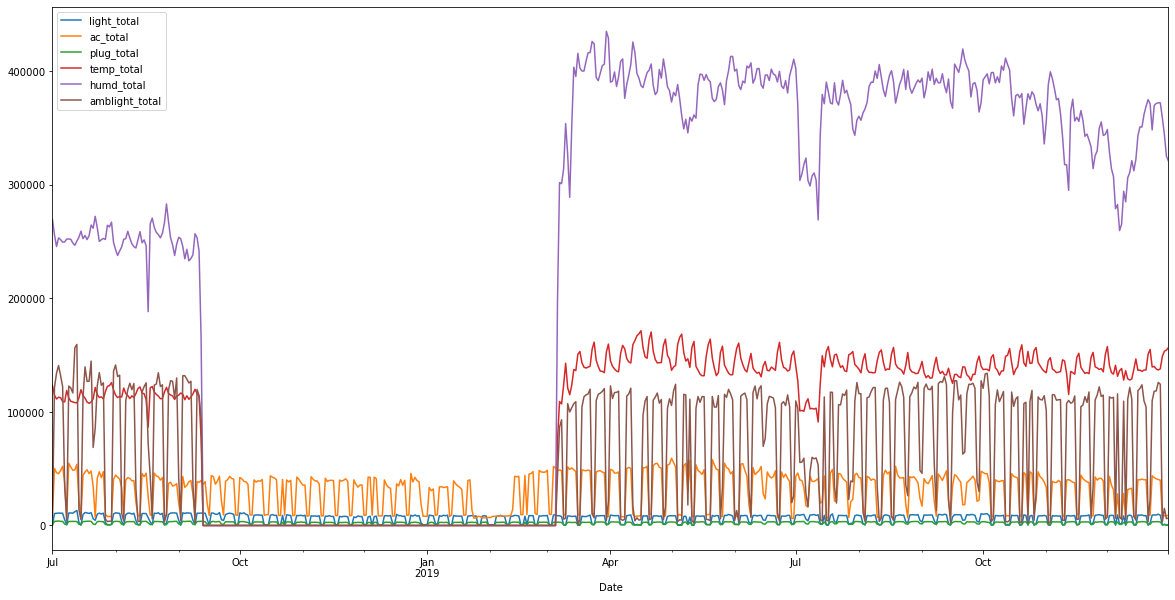

In [24]:
final_df.plot(figsize=(20,10))

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
res1=adfuller(final_df['light_total'])

In [27]:
def adfuller_test(p):
    result=adfuller(p)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [28]:
adfuller_test(final_df['light_total'])

ADF Test Statistic : -3.4410773005153277
p-value : 0.009635756223520399
#Lags Used : 19
Number of Observations Used : 529
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

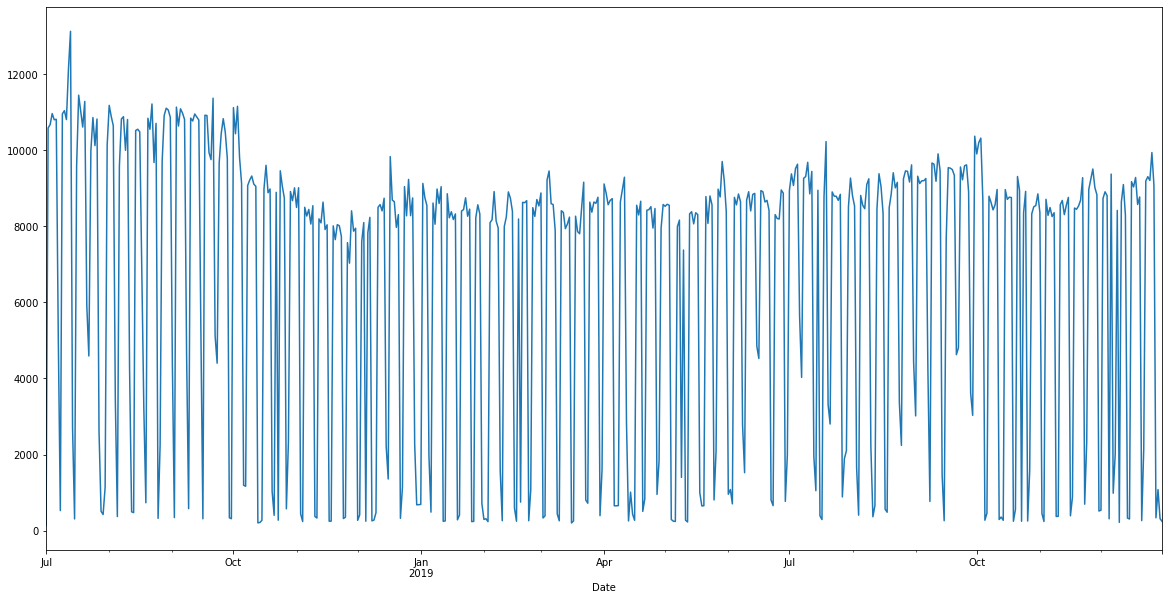

In [29]:
final_df['light_total'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

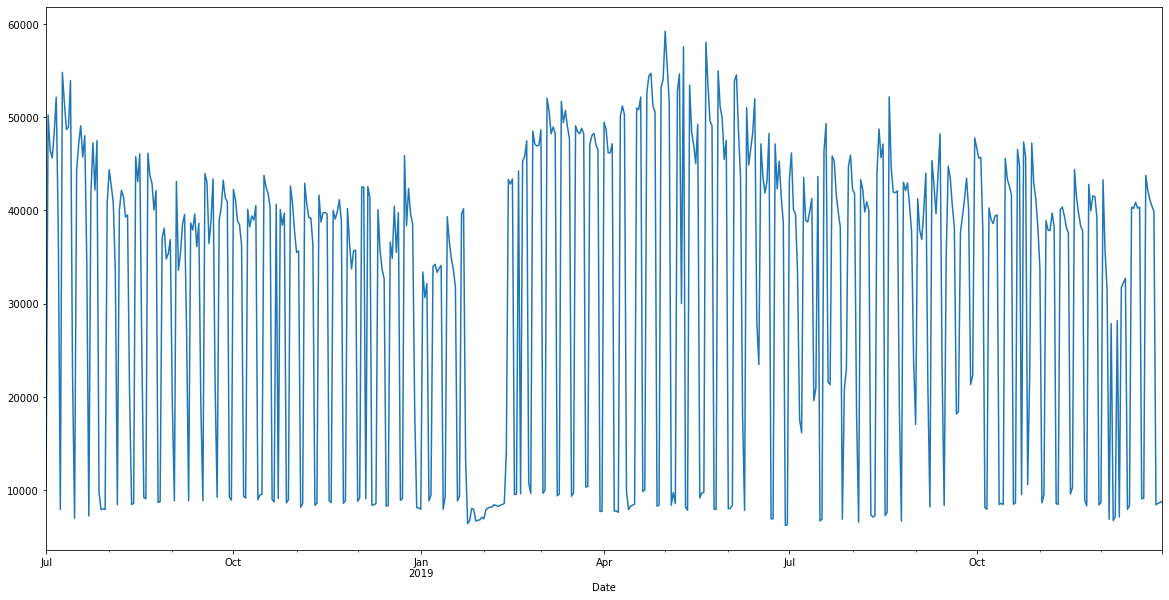

In [30]:
final_df['ac_total'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

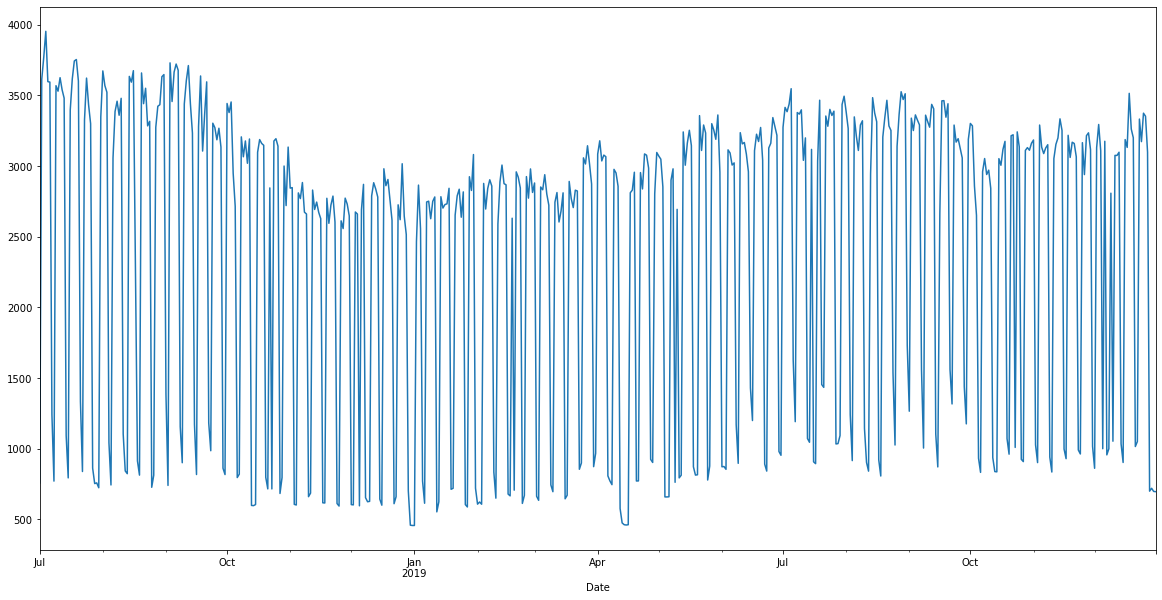

In [31]:
final_df['plug_total'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

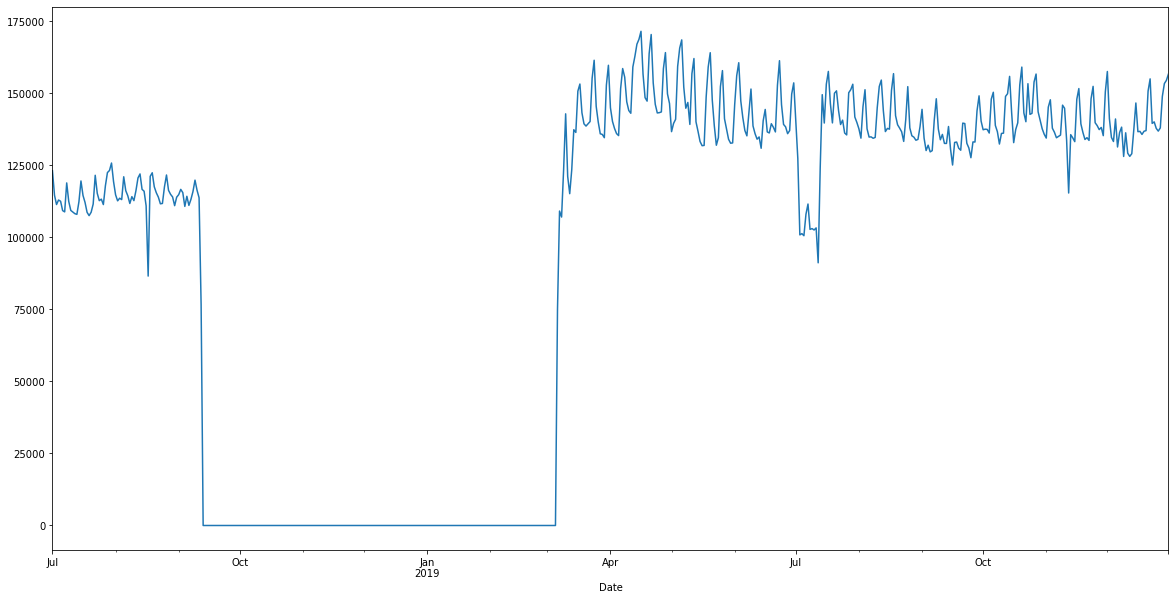

In [32]:
final_df['temp_total'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

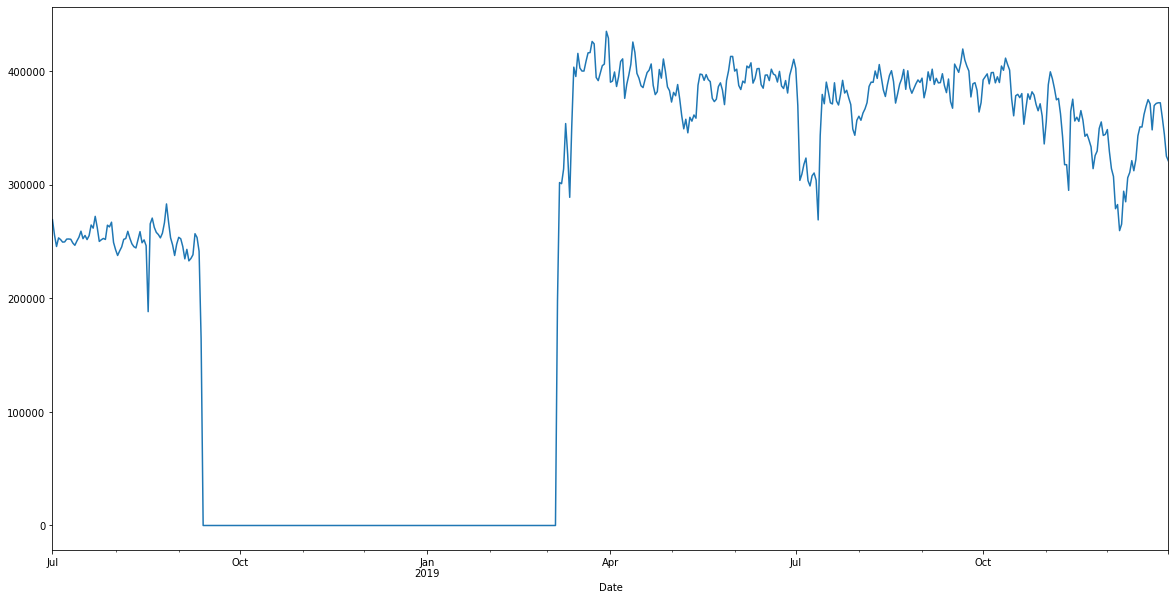

In [33]:
final_df['humd_total'].plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

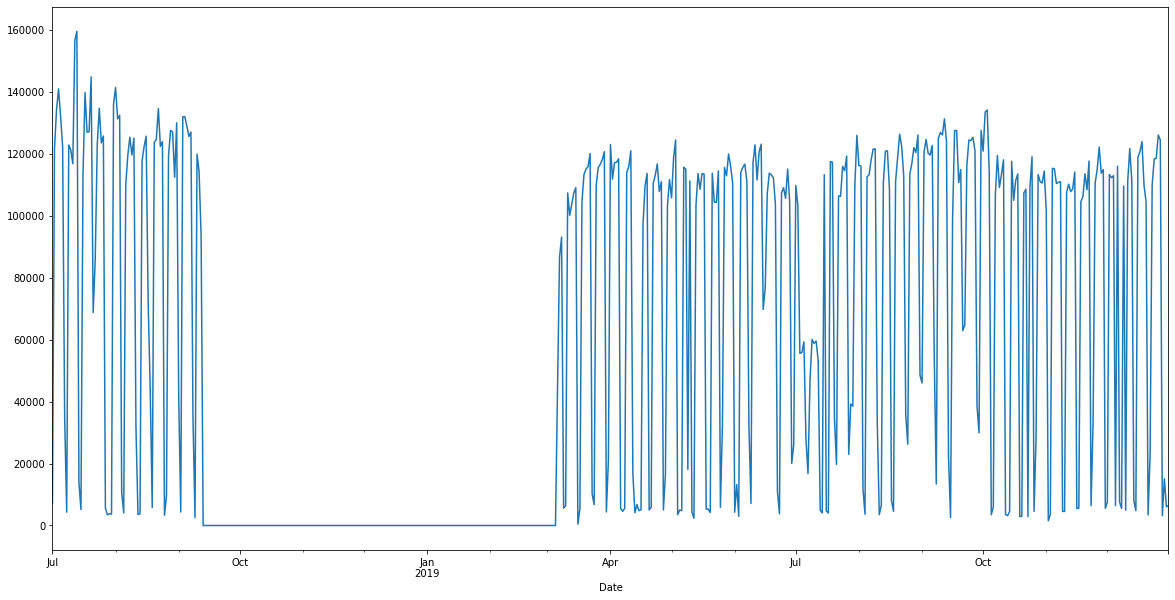

In [34]:
final_df['amblight_total'].plot(figsize=(20,10))

# Autocorrelation plot for Light

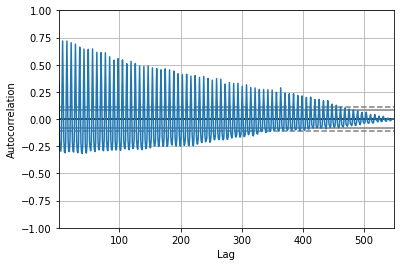

In [35]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(final_df['light_total'])
plt.show()

# Autocorrelation plot for AC

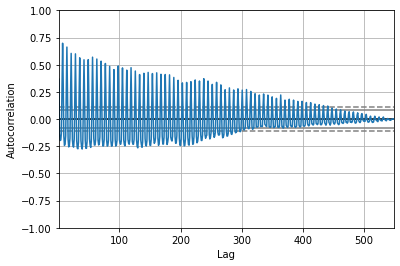

In [36]:
autocorrelation_plot(final_df['ac_total'])
plt.show()

# Autocorrelation plot for Plugs

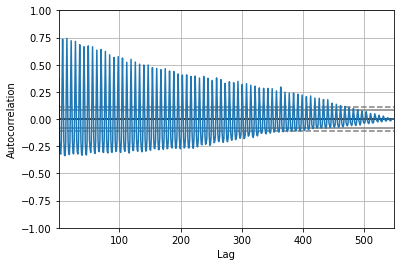

In [37]:
autocorrelation_plot(final_df['plug_total'])
plt.show()

C:\Users\yalla\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


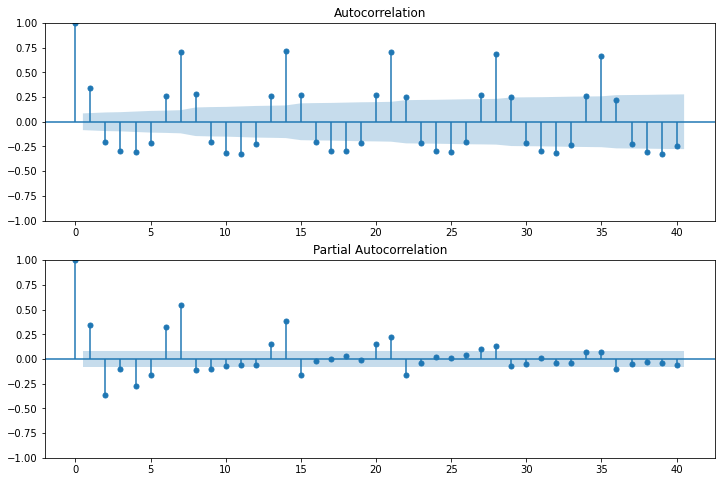

In [38]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(final_df['light_total'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(final_df['light_total'].iloc[13:],lags=40,ax=ax2)


# Arima for light_Energy consumption

In [39]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [40]:
model1=auto_arima(final_df['light_total'],trace=True,suppress_warnings=True)
model1.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10437.701, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10764.148, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10762.337, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10621.425, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10762.149, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10508.620, Time=1.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10476.426, Time=0.99 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10499.021, Time=1.35 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10360.899, Time=2.02 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10486.674, Time=1.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10444.431, Time=1.66 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=10349.148, Time=1.99 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=10484.079, Time=1.46 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(2,1,5)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -5044.275
Date:                Tue, 02 May 2023   AIC                          10110.550
Time:                        19:02:20   BIC                          10157.919
Sample:                    07-01-2018   HQIC                         10129.064
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9508      0.101      9.419      0.000       0.753       1.149
ar.L2         -1.5534      0.085    -18.198      0.000      -1.721      -1.386
ar.L3          1.0031      0.143      7.000      0.000       0.722       1.284
ar.L4         -1.1058      0.077    -14.293      0.000      -1.257      -0.954
ar.L5          0.1477      0.094      1.578      0.115      -0.036       0.331
ma.L1         -1.7654      0.080    -22.145      0.000      -1.922      -1.609
ma.L2          2.1172      0.159     13.282      0.000       1.805       2.430
ma.L3         -1.9802      0.181    -10.912      0.000      -2.336      -1.625
ma.L4          1.5163      0.137     11.051      0.000       1.247       1.785
ma.L5         -0.8475      0.066    -12.817      0.000      -0.977      -0.718
sigma2       8.84e+06   1.86e-08   4.76e+14      0.000    8.84e+06    8.84e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               704.38
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -1.65
Prob(H) (two-sided):                  0.79   Kurtosis:                         7.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.42e+30. Standard errors may be unstable.
"""

In [41]:
from statsmodels.tsa.arima_model import ARIMA

In [42]:
train=final_df.iloc[:-30]
test=final_df.iloc[-30:]
print(train.shape,test.shape)

(519, 6) (30, 6)


<AxesSubplot:title={'center':'Floor 2 Light Consumption'}, xlabel='Date'>

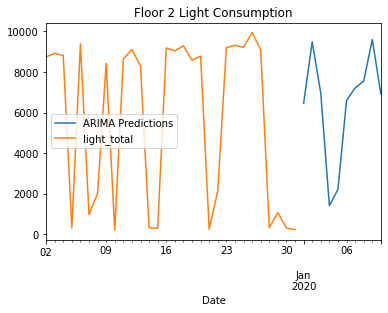

In [43]:
start=len(train)
end=len(train)+len(test)-1
pred=model1.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True,title='Floor 2 Light Consumption')
test['light_total'].plot(legend=True)

# Arima for AC_Energy consumption

In [44]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [45]:
model2=auto_arima(final_df['ac_total'],trace=True,suppress_warnings=True)
model2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12089.178, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12216.461, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12138.639, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12098.342, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13054.078, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=12098.779, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12085.763, Time=0.33 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=12102.545, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12083.680, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=12085.415, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=12087.351, Time=0.35 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=12307.239, Time=0.10 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.147 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -6037.840
Date:                Tue, 02 May 2023   AIC                          12083.680
Time:                        19:03:11   BIC                          12100.913
Sample:                    07-01-2018   HQIC                         12090.415
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.574e+04   1306.366     19.704      0.000    2.32e+04    2.83e+04
ar.L1          0.4865      0.052      9.412      0.000       0.385       0.588
ar.L2         -0.3141      0.053     -5.892      0.000      -0.419      -0.210
sigma2      2.079e+08      0.014   1.46e+10      0.000    2.08e+08    2.08e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                19.12
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                            -0.26
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.37e+25. Standard errors may be unstable.
"""

In [46]:
from statsmodels.tsa.arima_model import ARIMA

In [47]:
train=final_df.iloc[:-30]
test=final_df.iloc[-30:]
print(train.shape,test.shape)

(519, 6) (30, 6)


<AxesSubplot:title={'center':'Floor 2 AC Consumption'}, xlabel='Date'>

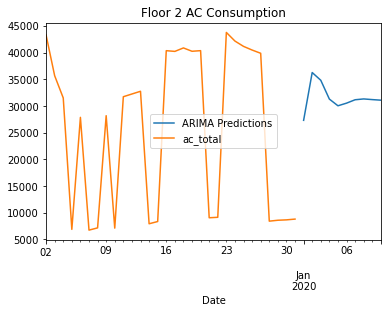

In [48]:
start=len(train)
end=len(train)+len(test)-1
pred=model2.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, title='Floor 2 AC Consumption')
test['ac_total'].plot(legend=True)

# Arima for Plug load_Energy consumption


In [49]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [50]:
model3=auto_arima(final_df['light_total'],trace=True,suppress_warnings=True)
model3.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10437.701, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10764.148, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10762.337, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10621.425, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10762.149, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10508.620, Time=1.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10476.426, Time=0.99 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10499.021, Time=1.38 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10360.899, Time=1.92 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10486.674, Time=1.44 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=10444.431, Time=1.63 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=10349.148, Time=1.97 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=10484.079, Time=1.49 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.13 sec
 ARIMA(2,1,5)(0,0,0)[0] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -5044.275
Date:                Tue, 02 May 2023   AIC                          10110.550
Time:                        19:03:59   BIC                          10157.919
Sample:                    07-01-2018   HQIC                         10129.064
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9508      0.101      9.419      0.000       0.753       1.149
ar.L2         -1.5534      0.085    -18.198      0.000      -1.721      -1.386
ar.L3          1.0031      0.143      7.000      0.000       0.722       1.284
ar.L4         -1.1058      0.077    -14.293      0.000      -1.257      -0.954
ar.L5          0.1477      0.094      1.578      0.115      -0.036       0.331
ma.L1         -1.7654      0.080    -22.145      0.000      -1.922      -1.609
ma.L2          2.1172      0.159     13.282      0.000       1.805       2.430
ma.L3         -1.9802      0.181    -10.912      0.000      -2.336      -1.625
ma.L4          1.5163      0.137     11.051      0.000       1.247       1.785
ma.L5         -0.8475      0.066    -12.817      0.000      -0.977      -0.718
sigma2       8.84e+06   1.86e-08   4.76e+14      0.000    8.84e+06    8.84e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):               704.38
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                            -1.65
Prob(H) (two-sided):                  0.79   Kurtosis:                         7.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.42e+30. Standard errors may be unstable.
"""

In [51]:
from statsmodels.tsa.arima_model import ARIMA

In [52]:
train=final_df.iloc[:-30]
test=final_df.iloc[-30:]
print(train.shape,test.shape)

(519, 6) (30, 6)


<AxesSubplot:title={'center':'Floor 2 Plug Load Consumption'}, xlabel='Date'>

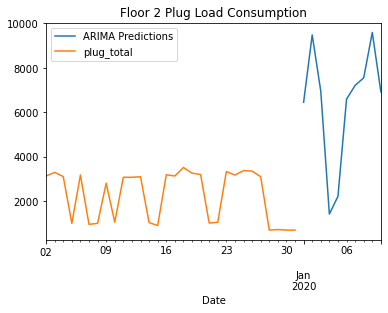

In [53]:
start=len(train)
end=len(train)+len(test)-1
pred=model3.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, title='Floor 2 Plug Load Consumption')
test['plug_total'].plot(legend=True)

# Total Power Consumption

In [54]:
final_df['Power Consumption']=final_df['light_total']+final_df['ac_total']+final_df['plug_total']
final_df

,light_total,ac_total,plug_total,temp_total,humd_total,amblight_total,Power Consumption
Date,,,,,,,
2018-07-01,132.25,10588.26,756.96,123149.77,269350.16,7195.0,11477.47
2018-07-02,10591.79,50242.27,3613.36,114661.12,255860.64,121649.0,64447.42
2018-07-03,10681.71,46462.80,3771.65,111419.96,245718.93,134156.0,60916.16
2018-07-04,10971.18,45621.64,3953.93,112985.72,253314.06,140898.0,60546.75
2018-07-05,10808.27,48335.21,3597.80,112554.69,251802.96,132035.0,62741.28
...,...,...,...,...,...,...,...
2019-12-27,9087.45,39859.41,3098.34,138022.98,372275.98,124404.0,52045.20
2019-12-28,335.38,8427.53,698.72,148944.84,359022.42,3171.0,9461.63
2019-12-29,1076.54,8597.58,718.99,153420.78,344444.42,15059.0,10393.11


In [55]:
from statsmodels.tsa.stattools import adfuller

In [56]:
res4=adfuller(final_df['Power Consumption'])

In [57]:
def adfuller_test(p):
    result=adfuller(p)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [58]:
adfuller_test(final_df['Power Consumption'])

ADF Test Statistic : -3.8974440265307972
p-value : 0.002053738395297578
#Lags Used : 19
Number of Observations Used : 529
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Arima For Total Power Consumption

In [59]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [60]:
model4=auto_arima(final_df['Power Consumption'],trace=True,suppress_warnings=True)
model4.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12363.163, Time=0.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=12486.581, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=12416.149, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=12373.377, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=13325.730, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=12374.632, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12353.800, Time=0.32 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=12376.252, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=12351.023, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=12351.417, Time=0.21 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=12352.885, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=12590.434, Time=0.09 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 2.567 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  549
Model:               SARIMAX(2, 0, 0)   Log Likelihood               -6171.512
Date:                Tue, 02 May 2023   AIC                          12351.023
Time:                        19:04:03   BIC                          12368.256
Sample:                    07-01-2018   HQIC                         12357.758
                         - 12-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.449e+04   1743.612     19.779      0.000    3.11e+04    3.79e+04
ar.L1          0.4742      0.050      9.477      0.000       0.376       0.572
ar.L2         -0.3395      0.052     -6.528      0.000      -0.441      -0.238
sigma2      3.381e+08      0.007   4.62e+10      0.000    3.38e+08    3.38e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                26.44
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.36
Prob(H) (two-sided):                  0.53   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.66e+26. Standard errors may be unstable.
"""

In [61]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:
train=final_df.iloc[:-30]
test=final_df.iloc[-30:]
print(train.shape,test.shape)

(519, 7) (30, 7)


<AxesSubplot:title={'center':'Floor 2 Total Power Consumption'}, xlabel='Date'>

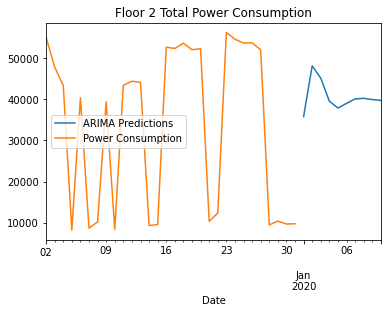

In [74]:
start=len(train)
end=len(train)+len(test)+30
pred=model4.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, title='Floor 2 Total Power Consumption')
test['Power Consumption'].plot(legend=True)

In [71]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(train['Power Consumption'], pred['ARIMA Predictions']))

ValueError: Found input variables with inconsistent numbers of samples: [519, 30]

In [64]:
test

,light_total,ac_total,plug_total,temp_total,humd_total,amblight_total,Power Consumption
Date,,,,,,,
2019-12-02,8740.77,43278.27,3130.34,141236.63,329368.07,113267.0,55149.38
2019-12-03,8912.50,35654.82,3294.33,134722.42,314298.56,112219.0,47861.65
2019-12-04,8811.48,31495.51,3108.12,133300.33,307395.66,112886.0,43415.11
2019-12-05,307.96,6889.50,999.08,141121.07,279015.04,6421.0,8196.54
2019-12-06,9378.41,27862.55,3175.58,131399.01,282668.60,115931.0,40416.54
2019-12-07,981.66,6749.11,955.56,136371.38,259695.27,7520.0,8686.33
2019-12-08,2018.42,7168.44,998.84,138282.05,265400.97,5499.0,10185.70
2019-12-09,8422.91,28175.53,2807.91,128110.71,294396.90,109532.0,39406.35
2019-12-10,214.18,7121.62,1052.22,136324.22,285093.85,4957.0,8388.02


In [75]:
pred


2020-01-01    35822.451445
2020-01-02    48162.936159
2020-01-03    45162.117128
2020-01-04    39549.589748
2020-01-05    37907.080057
2020-01-06    39033.718047
2020-01-07    40125.573070
2020-01-08    40260.802090
2020-01-09    39954.236059
2020-01-10    39762.960841
Freq: D, Name: ARIMA Predictions, dtype: float64

In [67]:
train

,light_total,ac_total,plug_total,temp_total,humd_total,amblight_total,Power Consumption
Date,,,,,,,
2018-07-01,132.25,10588.26,756.96,123149.77,269350.16,7195.0,11477.47
2018-07-02,10591.79,50242.27,3613.36,114661.12,255860.64,121649.0,64447.42
2018-07-03,10681.71,46462.80,3771.65,111419.96,245718.93,134156.0,60916.16
2018-07-04,10971.18,45621.64,3953.93,112985.72,253314.06,140898.0,60546.75
2018-07-05,10808.27,48335.21,3597.80,112554.69,251802.96,132035.0,62741.28
...,...,...,...,...,...,...,...
2019-11-27,9512.77,41568.16,3215.02,137431.88,349686.54,122109.0,54295.95
2019-11-28,9024.26,41472.34,3235.28,138181.28,355432.27,113664.0,53731.88
2019-11-29,8833.64,39231.39,3116.38,135326.29,343522.19,114838.0,51181.41


In [68]:
from sklearn import metrics
print ('MAE:', metrics.mean_absolute_error(test, train))
# print ('MSE:', metrics.mean_squared_error(df_test['Prediction'], df_test['Power_consumption']))
# print ('RSME:', np.sqrt(metrics.mean_absolute_error(df_test['Prediction'], df_test['Power_consumption'])))

ValueError: Found input variables with inconsistent numbers of samples: [30, 519]